### Содержание

[Подготовка данных](#Data_preparation)
1. [Столбчатая диаграмма](#Bar_chart)  
   1.1 [Выводы](#Сonclusions_1)
2. [Гистограмма](#Histogram)  
   2.1 [Выводы](#Сonclusions_2)
3. [Горизонтальная толбчатая диаграмма](#Barh_chart)  
   3.1 [Выводы](#Сonclusions_3)   
4. [Ящик с усами](#Boxplot)  
   4.1 [Выводы](#Сonclusions_4)   
5. [Тепловая карта](#Heatmap)  
   5.1 [Выводы](#Сonclusions_5)   
6. [Матрица диаграмм рассеяния](#Scatter_plot_matrix)  
   6.1 [Выводы](#Сonclusions_6)    
   

In [1]:
# Загружаем бибилиотеки для работы с данными и визуализации
import pandas as pd
import matplotlib.pyplot as plt

#### Подготовка данных <a id = 'Data_preparation'></a>

In [2]:
# Будем работать с массивом данных об уровне счастья в разных странах
# 
# Загружаем данные с 2015 по 2019 годы
# Сразу замечаем, что это счастливые годы до коронавирусной пандемии :)

# В исходных файлах нет единообразия наименований, поэтому нужно привести их к одному виду
# Будем работать со следующими названиями столбцов
col_names = [
    'Country', # Название страны
    'Happiness', # Cубъективная оценка счастья людей (от 0 до 10)
    'Economy', # Экономические показатели
    'Family', # Социальная поддержка
    'Health', # Ожидаемая продолжительность жизни
    'Freedom', # Свобода жизненного выбора
    'Trust', # Степень доверия и уровень коррупции
    'Generosity' # Благотворительность
]

# Читаем файлы, берём нужные столбцы и переименовываем их
happiness_2015 = pd.read_csv('2015.csv', usecols = [0, 3, 5, 6, 7, 8, 9, 10], names = col_names, header = 0)
happiness_2016 = pd.read_csv('2016.csv', usecols = [0, 3, 6, 7, 8, 9, 10, 11], names = col_names, header = 0)
happiness_2017 = pd.read_csv('2017.csv', usecols = [0, 2, 5, 6, 7, 8, 9, 10], names = (col_names[:6] + [col_names[7]] + [col_names[6]]), header = 0)[col_names]
happiness_2018 = pd.read_csv('2018.csv', usecols = [1, 2, 3, 4, 5, 6, 7, 8], names = (col_names[:6] + [col_names[7]] + [col_names[6]]), header = 0)[col_names]
happiness_2019 = pd.read_csv('2019.csv', usecols = [1, 2, 3, 4, 5, 6, 7, 8], names = (col_names[:6] + [col_names[7]] + [col_names[6]]), header = 0)[col_names]

# Всю необходимую информацию нужно свести в рабочий датафрейм
#
# Сначала формируем список стран, для которых есть данные за все годы
# По умолчанию используется метод inner
happiness = pd.merge(happiness_2015['Country'], happiness_2016['Country']).merge(happiness_2017['Country']).merge(happiness_2018['Country']).merge(happiness_2019['Country'])
# Добавляем регион, к которому относятся страны
happiness['Region'] = pd.read_csv('2015.csv', index_col = ['Country'], usecols = ['Country', 'Region']).loc[happiness['Country']]['Region'].tolist()
# Добавляем столбец с номером года к каждому из датафреймов
# (Это необходимо для формирования единого датафрейма с учётом годов)
happiness_2015['Year'] = 2015
happiness_2016['Year'] = 2016
happiness_2017['Year'] = 2017
happiness_2018['Year'] = 2018
happiness_2019['Year'] = 2019
# Объединяем датафреймы
df_2015 = pd.merge(happiness, happiness_2015, how = 'left', on = 'Country')
df_2016 = pd.merge(happiness, happiness_2016, how = 'left', on = 'Country')
df_2017 = pd.merge(happiness, happiness_2017, how = 'left', on = 'Country')
df_2018 = pd.merge(happiness, happiness_2018, how = 'left', on = 'Country')
df_2019 = pd.merge(happiness, happiness_2019, how = 'left', on = 'Country')
happiness = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019]).reset_index(drop = True)

#### Столбчатая диаграмма <a id = 'Bar_chart'></a>

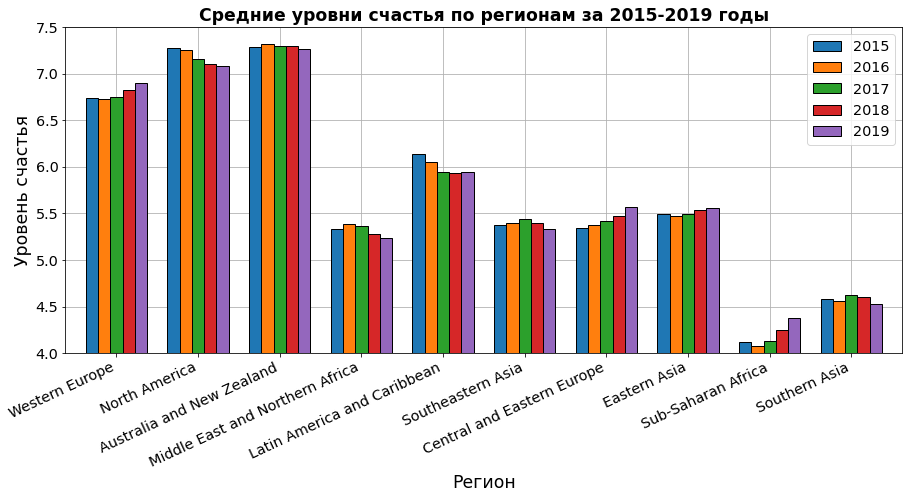

In [8]:
# Построим столбчатую диаграмму
#
# По горизонтальной оси расположим регионы, сгруппированные по годам
# По вертикальной оси отложим средние показатели счастья по регионам


# Группируем данные по регионам и годам, берём среднее арифметическое
happiness_by_region = pd.DataFrame(index = happiness['Region'].unique())
for year in happiness['Year'].unique():
    happiness_by_region[year] = happiness.loc[happiness['Year'] == year, ['Region', 'Happiness']].groupby('Region').mean()

# Строим график
happiness_by_region.plot(kind = 'bar', # Тип 'bar' - столбчатая диаграмма
                         figsize = (15, 6), # Размер поля в дюймах
                         width = 0.75, # Подбираем ширину столбцов для лучшей читаемости
                         edgecolor = 'black', # Используем контур для отделения смежных столбцов
                         ylim = (4, 7.5), # Для улучшения наглядности выставляем пределы по вертикальной оси
                         zorder = 2 # Диаграмма над сеткой
                         )
# Отрисуем основную сетку
plt.grid()
# Для улучшения читаемости увеличим и повернём подписи делений по горизонтальной оси
plt.xticks(rotation = 25, horizontalalignment = 'right')
plt.tick_params(labelsize = 'x-large')

# Добавим название диаграммы и подписи осей
plt.title('Средние уровни счастья по регионам за 2015-2019 годы', fontsize = 'xx-large', fontweight = 'bold')
plt.xlabel('Регион', fontsize = 'xx-large')
plt.ylabel('Уровень счастья', fontsize = 'xx-large')
# Увеличиваем шрифт легенды
plt.legend(fontsize = 'x-large')

plt.show()

#### Выводы <a id = 'Сonclusions_1'></a>

1. На диаграмме видно достаточной чёткое разделение регионов на несколько групп по уровню частья:
    - В первую группу с относительно высоким уровнем счастья входят регионы:
        - Западная Европа (Western Europe) 
        - Северная Америка (North America) 
        - Австралия и Новая Зеландия (Australia and New Zealand)
    - Во вторую группу со средним уровнем счастья входят регионы:
        - Ближний Восток и Северная Африка (Middle East and Northern Africa)
        - Юго-Восточная Азия (Southeastern Asia)
        - Центральная и Восточная Европа (Central and Eastern Europe)
        - Восточная Азия (Eastern Asia)
    - В третью группу с относительно низким уровнем счастья входят регионы:
        - Тропическая Африка (Sub-Saharan Africa)
        - Южная Азия (Southern Asia)
    - Не входит в указанные группы регион Латинской Америки и Карибского бассейна (Latin America and Caribbean), он занимает промежуточное положение между группами с высоким и средним уровнем счастья 
2. Наибольший уровень счастья в Австралии и Новой Зеландии, причём он практически не изменяется со временем.
3. Наименьший уровень счастья в Тропической Африке, с течением времени он возрастает.
4. За указанный период времени уровень счастья:
    - повышается в регионах: 
        - Западная Европа
        - Центральная и Восточная Европа
        - Тропическая Африка
    - понижается в регионах: 
        - Северная Америка
        - Латинская Америка и Карибский бассейн
    - практически не изменяется в регионах:
        - Австралия и Новая Зеландия
        - Ближний Восток и Северная Африка
        - Южная Азия
        - Восточная Азия
        - Южная Азия    
5. В целом уровень счастья по регионам относительно стабилен и незначительно изменяется за рассмотренный период времени. Разница между группами регионов велика, не наблюдается тенденции перехода регионов между указанными группами.

#### Гистограмма <a id = 'Histogram'></a>

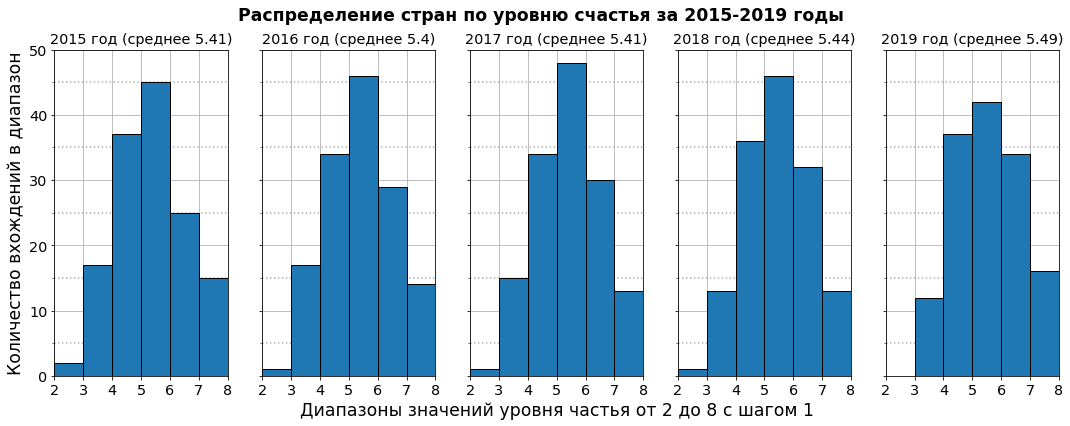

In [4]:
# Построим гистограмму
#
# По горизонтальной оси расположен диапазон показателей счастья, разбитый на интервалы с шагом 1
# По вертикальной оси отложим количество вхождений в интервалы для каждой страны

# Создаём поле для 5 графиков
fig, axes = plt.subplots(nrows = 1, # Одна строка с графиками
                         ncols = 5, # В строке 5 графиков
                         figsize=(18, 6), # Размер общего поля
                         sharey = 'all' # Делаем вертикальную ось общей для всех графиков
                        ) 

# Построим 5 гистограмм по годам
for i in range(0, 5):
    # Строим гистограмму
    axes[i].hist(happiness[happiness['Year'] == (2015 + i)]['Happiness'], # Берём данные по годам
                           bins = range(0, 11), # Создаём список диапазонов от 0 до 10 с шагом 1
                           edgecolor = 'black', # Используем контур для отделения смежных столбцов
                           zorder = 2 # Это слой, необходим чтобы гистограмма (zorder = 2) лежала над сеткой (zorder = 1)
                          )
    
    # Внешний вид графиков
    axes[i].set_xlim(2, 8) # Наши значения лежат в пределах от 2 до 8, нет смысла отображать пустые интервалы
    axes[i].set_xticks(range(2, 9)) # Основные деления по горизонтальной оси от 2 до 8 с шагом 1
    axes[i].set_ylim(0, 50) # Пределы по вертикальной оси
    axes[i].set_yticks(range(0, 60, 10)) # Основные деления по вертикальной оси от 0 до 50 с шагом 10
    axes[i].set_yticks(range(0, 55, 5), minor = True) # Дополнительные деления по вертикальной оси от с шагом 5
    axes[i].tick_params(labelsize = 'x-large')
    axes[i].grid(which = 'major', axis ='both') # Включаем основную сетку
    axes[i].grid(which = 'minor', axis = 'y', linestyle = ':', linewidth = 1.5) # Включаем дополнительную сетку
        
    # Надписи
    axes[i].set_title((str(2015 + i) + ' год (среднее ' + str(round(happiness[happiness['Year'] == (2015 + i)]['Happiness'].mean(), 2)) + ')'), fontsize = 'x-large')

# Общая надпись    
fig.suptitle('Распределение стран по уровню счастья за 2015-2019 годы', fontsize = 'xx-large', fontweight = 'bold')  
# Надпись по вертикальной оси
axes[0].set_ylabel('Количество вхождений в диапазон', fontsize = 'xx-large')
# Надпись по горизонтальной оси (присваиваем среднему графику для расположения по центру)
axes[2].set_xlabel('Диапазоны значений уровня частья от 2 до 8 с шагом 1', fontsize = 'xx-large')    

plt.show()

#### Выводы <a id = 'Сonclusions_2'></a>

1. На гистограмме показано распределение стран по уровню счастья. Весь диапазон значений уровня счастья разбит на участки от 2 до 8 с шагом 1, посчитано количество вхождений в каждый их них. Наблюдаются следующие зависимости:
    - Количество стран с наиболее низкими показателями счастья (от 2 до 4) с течением времени снижается, причём в 2019 году не осталось ни одной страны с уровнем счастья в диапазоне от 2 до 3
    - Количество стран со средними показателями счастья (от 4 до 6) относительно стабильно, изменения с течением времени назначительны
    - Количество стран с уровнем счастья выше среднего (от 6 до 7) с течением времени возрастает
    - Количество самых счастливых стран с высоким уровнем счастья (от 7 до 8) с течением времени практически не меняется
2. Среднее арифметическое показателя уровня счастья для всех стран с течение времени возрастает (от 5,41 в 2015 году до 5,49 в 2019 году). 
3. Перечисленные выше наблюдения позволяют сделать вывод о том, что уровень счастья в мире в целом за рассмотренный период времени возрастает.
    

#### Горизонтальная столбчатая диаграмма <a id = 'Barh_chart'></a>

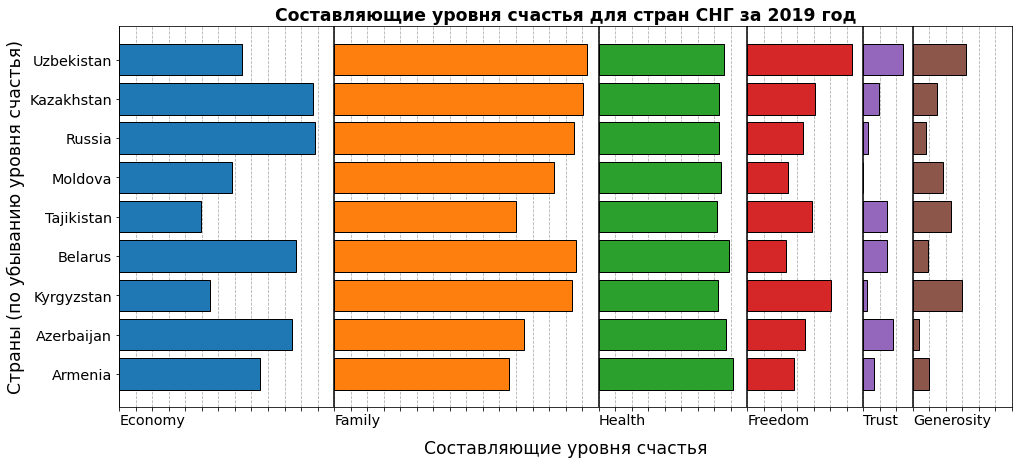

In [5]:
# Построим горизонтальную столбчатую диаграмму
#
# По горизонтальной оси расположены значения составляющих показателей счастья
# По вертикальной оси расположены страны СНГ

# Список стран СНГ'
CIS_countries = ['Azerbaijan', 'Armenia', 'Belarus', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Russia', 'Tajikistan', 'Uzbekistan']

# Группируем данные за 2019 год по странам СНГ, сортируем по уровню счастья
happiness_сomponents = happiness.loc[(happiness['Country'].isin(CIS_countries)) & (happiness['Year'] == 2019),
                                    ['Country', 'Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
                                    ].sort_values(by = 'Happiness', ascending = True).set_index('Country')

# Размер поля поле для графика
plt.figure(figsize=(16,7))

# Строим диаграммы для каждого из составляющих уровня счастья со смещением по горизонтальной оси
offset = 0
for сomponent in ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']:
    plt.barh(range(len(happiness_сomponents)), happiness_сomponents[сomponent], 
             left = offset, # Задаём смещение для каждой новой групы
             edgecolor = 'black',
             zorder = 2
            )
    # Выставляем вертикальные линии и пояснения
    plt.axvline(x = offset, color = 'black', )
    plt.text(offset, -1, сomponent, fontsize = 'x-large', verticalalignment = 'top')
    # Добавляем к отступу 0.1 чтобы графики не лепились друг на друга
    offset += round(happiness_сomponents[сomponent].max() + 0.1, 1)

# Создаём надписи к столбцам (название страны + значение уровня счастья)
plt.yticks(ticks = range(len(happiness_сomponents)), # Количество столбцов на диаграмме
           labels = happiness_сomponents.index, # Названия стран
           fontsize = 'x-large'
           )

# Выставляем вертикальную сетку
plt.xticks([tick / 10 for tick in range(int(round(offset + happiness_сomponents['Generosity'].max(), 1) * 10))], labels = [])
plt.grid(which = 'both', axis = 'x', linestyle = '--')
     
# Добавим название диаграммы и подписи осей
plt.title('Составляющие уровня счастья для стран СНГ за 2019 год', fontsize = 'xx-large', fontweight = 'bold')
plt.xlabel('\nСоставляющие уровня счастья', fontsize = 'xx-large')
plt.ylabel('Страны (по убыванию уровня счастья)', fontsize = 'xx-large')

plt.show()

#### Выводы <a id = 'Сonclusions_3'></a>

1. На столбчатой диаграмме показаны составляющие уровня счастья для стран СНГ, страны расположены в порядке убывания уровня счастья. Длина элементов столбца обозначает в какой степени отдельные составляющие влияют на уровень счастья для каждой страны:
    - Экономические показатели (Economy) вносят наибольший вклад в уровень счастья в России и Казахстане, наименьший в Таджикистане
    - Социальная поддержка (Family) вносит наибольший вклад в Узбекистане и Казахстане, наименьший в Армении
    - Ожидаемая продолжительность жизни (Health) вносит наибольший вклад в Армении и Беларуси, наименьший в Таджикистане
    - Свобода жизненного выбора (Freedom) вносит наибольший вклад в Узбекистане, наименьший в Молдове и Беларуси
    - Степень доверия и уровень коррупции (Trust) вносит наибольший вклад в Узбекистане, наименьший в Молдове 
    - Благотворительность (Generosity) вносит наибольший вклад в Узбекистане, наименьший в Азербайджане
2. В целом, в странах СНГ социальная поддрежка вносит самый значительный вклад в уровень счастья, на втором месте экономические показатели, на третьем - ожидаемая продолжительность жизни. Наименьший вклад в уровень счастья вносит степень доверия и уровень коррупции, а также благотворительность.
3. Интересно отметить, что в самой счастливой стране СНГ (Узбекистане) в наибольшей степени относительно других стран вносят вклад социальная поддержка, свобода жизненного выбора, степень доверия и уровень коррупции, благотворительность.



#### Ящик с усами <a id = 'Boxplot'></a>

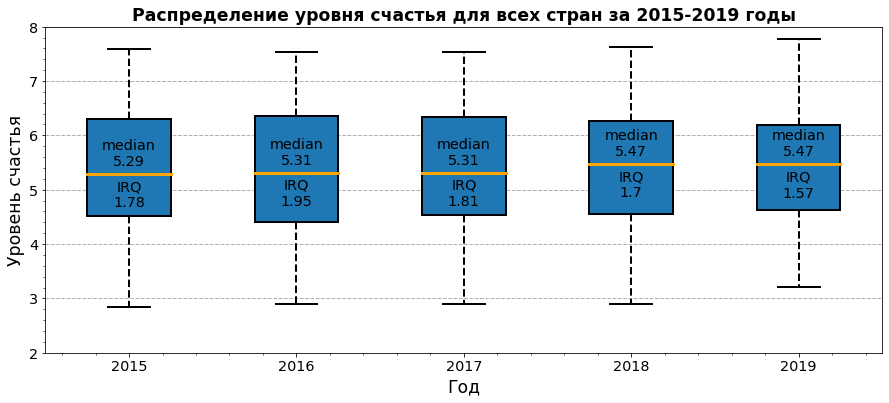

In [6]:
# Построим диаграмму "Ящик с усами"
#
# По горизонтальной оси расположены отметки гоов с 2015 по 2019
# По вертикальной оси уровень счастья для всех стран

# Группируем данные об уровне счастья по годам
happiness_by_year = pd.DataFrame(index = happiness['Country'].unique(), columns = happiness['Year'].unique())
for year in happiness['Year'].unique():
    happiness_by_year[year] = happiness.loc[happiness['Year'] == year, ['Country', 'Happiness']].set_index('Country')
    
# Строим график
happiness_by_year.plot(kind = 'box', # Тип 'box' - ящик с усами
                       figsize = (15, 6), # Размер поля в дюймах
                       patch_artist = True, # Заполним прямоугольники цветом
                       medianprops = {'color': 'orange', 'linewidth': 3}, # Линия медианы
                       boxprops = {'color': 'black', 'linewidth': 2}, # Линия прямоугольника
                       whiskerprops = {'color': 'black', 'linewidth': 2, 'linestyle': '--'}, # Линии усов
                       capprops = {'color': 'black', 'linewidth': 2}, # Линии границ
                       ylim = (2, 8), # Для улучшения наглядности выставляем пределы по вертикальной оси
                       )

# Увеличиваем текст по осям
plt.tick_params(labelsize = 'x-large')

# Добавляем сетку
plt.minorticks_on()
plt.grid(axis = 'y', linewidth = 1, linestyle = '--')

# Добавим название диаграммы и подписи осей
plt.title('Распределение уровня счастья для всех стран за 2015-2019 годы', fontsize = 'xx-large', fontweight = 'bold')
plt.xlabel('Год', fontsize = 'xx-large')
plt.ylabel('Уровень счастья', fontsize = 'xx-large')

# Выведем значения медианы и межквартильного размаха
for year in happiness['Year'].unique():
    plt.text((year - 2014), 
             happiness_by_year[year].median() + 0.1, 
             s = 'median\n' + str(round(happiness_by_year[year].median(), 2)), 
             fontsize = 'x-large', 
             verticalalignment = 'bottom',
             horizontalalignment = 'center'
            )
    plt.text((year - 2014), 
             happiness_by_year[year].median() - 0.1, 
             s = 'IRQ\n' + str(round(happiness_by_year[year].quantile(0.75) - happiness_by_year[year].quantile(0.25), 2)), 
             fontsize = 'x-large', 
             verticalalignment = 'top',
             horizontalalignment = 'center'
            )

plt.show()

#### Выводы <a id = 'Сonclusions_4'></a>

1. На диаграмме показано распределение уровня счастья для всех стран с помощью "ящиков с усами". Его элементы обозначают следующее:
    - Медиана (median) обозначена оранжевой линией, показывает центр распределения (половина стран имеют большее значение показателя счастья, другая половина - меньшее)
    - Тело ящика обозначает межквартильный размах (IRQ), он показывает пределы значений показателя счастья, в которых расположена половина стран
    - Усы обозначают максиммальный и минимальный пределы значений показателя счастья, все выходящие за указанные пределы значения является выбросами
2. По диаграмме видно, что с течением времени медиана увеличивается, это означает что в целом уровень счастья в мире повышается. Межквартильный размах с течением времени снижается, значит разрыв между странами сокращается.
3. Линия медианы расположена практически посередине тела ящика, это значит, что распределение близко к симметричному. Следовательно, степень различия в уровне счастья между странами в наиболее счастливой половине и в наименнее счастливой половине примерно одинаковая.
4. Выбросы отсутствуют, все страны входят в границы минимума и максимума.


#### Тепловая карта <a id = 'Heatmap'></a>

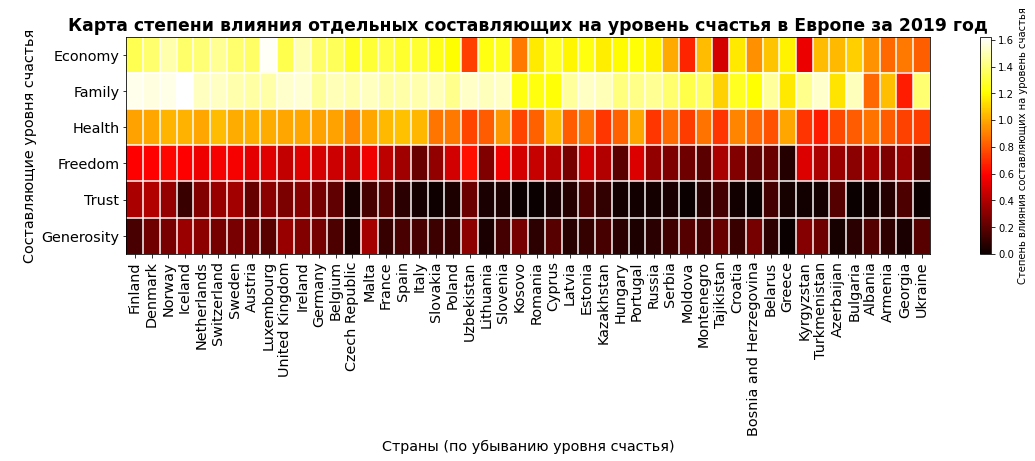

In [7]:
# Построим тепловую карту
#
# По горизонтальной оси расположены страны Европы 
# По вертикальной оси расположены составляющие уровня счастья за 2019 год

# Группируем данные об уровне счастья
happiness_europe_2019 = happiness.loc[((happiness['Region'] == 'Western Europe') | (happiness['Region'] == 'Central and Eastern Europe')) & (happiness['Year'] == 2019),
                                     ['Country', 'Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
                                     ].sort_values(by = 'Happiness', ascending = False).set_index('Country')[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']].transpose()
# Размеры поля диаграммы
plt.figure(figsize = (18, 4))
# Строим диаграмму типа "тепловая карта"
plt.imshow(happiness_europe_2019, # Данные для построения диаграммы
           cmap = 'hot', # Цветовая схема
           aspect = 'auto') # Автоматическое масштабирование диаграммы
# Отображаем шкалу
plt.colorbar(label = "Степень влияния составляющих на уровень счастья", 
             orientation = 'vertical',
             )
# Надписи делений по осям
plt.xticks(range(len(happiness_europe_2019.columns)), 
           happiness_europe_2019.columns, 
           fontsize = 'x-large',
           rotation = 90
           )
plt.yticks(range(len(happiness_europe_2019)), 
           happiness_europe_2019.index,
           fontsize = 'x-large'
           )

# Подписи осей
plt.title('Карта степени влияния отдельных составляющих на уровень счастья в Европе за 2019 год', fontsize = 'xx-large', fontweight = 'bold')
plt.xlabel('Страны (по убыванию уровня счастья)', fontsize = 'x-large')
plt.ylabel('\nСоставляющие уровня счастья', fontsize = 'x-large')

# Разграничиваем ячейки для лучшего восприятия
plt.vlines(x = [x + 0.5 for x in range(len(happiness_europe_2019.columns) -1)], ymin = -0.5, ymax = (len(happiness_europe_2019) - 0.5), color = 'white')
plt.hlines(y = [y + 0.5 for y in range(len(happiness_europe_2019) - 1)], xmin = -0.5, xmax = (len(happiness_europe_2019.columns) - 0.5), color = 'white')

plt.show()

#### Выводы <a id = 'Сonclusions_5'></a>

1. На диаграмме показана степень влияния отдельных составляющих на уровень счастья стран Европы за 2019 год. Тепловая карта показывает степень влияния с помощью оттенков цвета от наименьшей (чёрный) до наибольшей (белый).
2. По информации, представленной на диаграмме, можно сделать следующие выводы:
    - Наибольшее влияние для всех стран оказывают экономические показатели (Economy) и социальная поддержка (Family) по сравнению с другими составляющими уровня счастья
    - Для стран Западной Европы такие составляющие как ожидаемая продолжительность жизни (Health) и свобода жизненного выбора (Freedom) в большей степени оказывают влияние на уровень счастья по сравнению со странами Центральной и Восточной Европы
    - Степень доверия и уровень коррупции (Trust) и благотворительность (Generosity) оказывают наименьшее влияние на уровень счастья по сравнению с другими составляющими

#### Матрица диаграмм рассеяния <a id = 'Scatter_plot_matrix'></a>

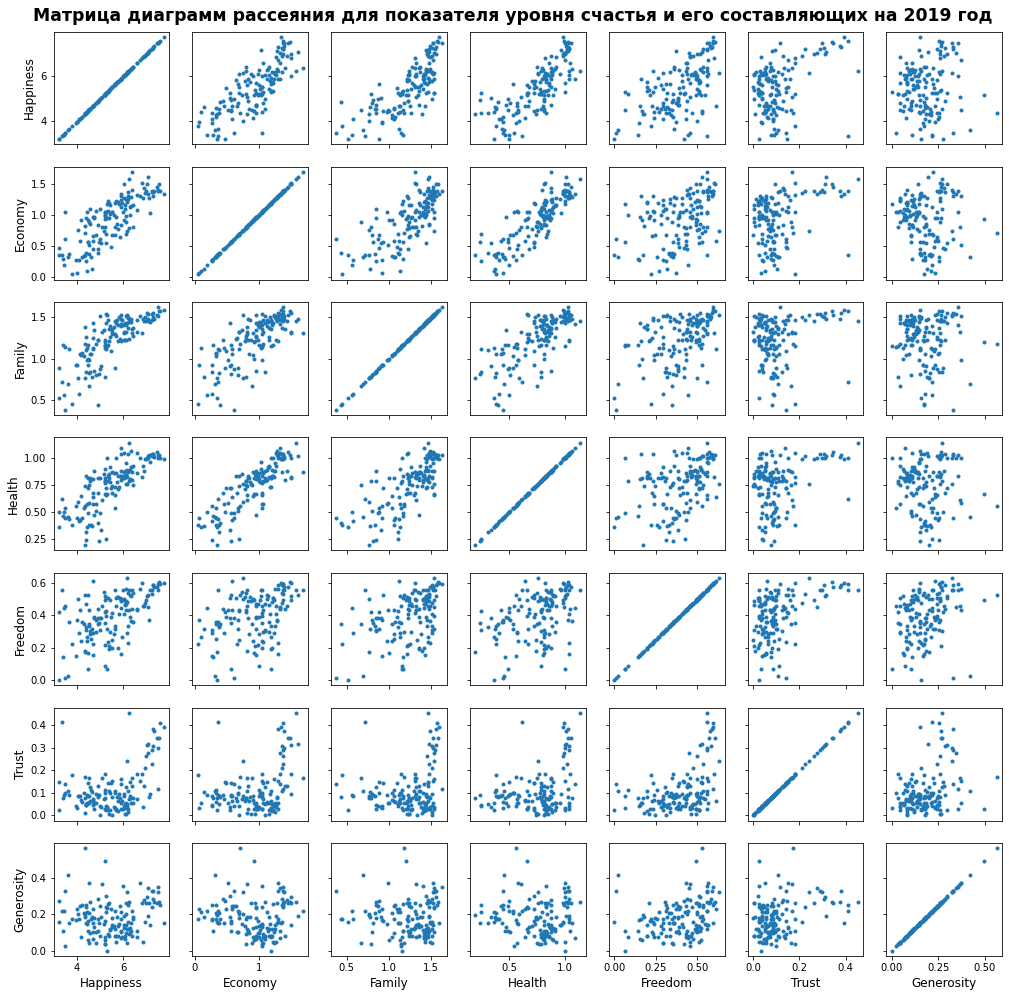

In [123]:
# Построим матрицу диаграмм рассеяния для показателя уровня счастья и его составляющих на 2019 год

# Группируем данные об уровне счастья и его составляющих
elements = ['Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
happiness_matrix_2019 = happiness[happiness['Year'] == 2019][elements]

# Создаём поле для графиков
fig, axes = plt.subplots(nrows = 7, # Строк 7
                         ncols = 7, # Столбцов 7
                         figsize=(17, 17), # Размер общего поля
                        ) 

# Строим матрицу
for row in range(len(happiness_matrix_2019.columns)):
    for col in range(len(happiness_matrix_2019.columns)):
        axes[row, col].scatter(happiness_matrix_2019.iloc[:,col], 
                               happiness_matrix_2019.iloc[:,row], 
                               zorder = 2, 
                               marker = '.'
                               )
       
        # Убираем лишние подписи к делениям
        if row != (len(happiness_matrix_2019.columns) - 1):
            axes[row, col].set_xticklabels([])
        if col != 0:
            axes[row, col].set_yticklabels([])        
        
        # Подписываем строки и столбцы матрицы
        if row == (len(happiness_matrix_2019.columns) - 1):
            axes[row, col].set_xlabel(happiness_matrix_2019.columns[col], fontsize = 'large')
        if col == 0:
            axes[row, col].set_ylabel(happiness_matrix_2019.columns[row], fontsize = 'large')

plt.suptitle('Матрица диаграмм рассеяния для показателя уровня счастья и его составляющих на 2019 год', fontsize = 'xx-large', fontweight = 'bold', y = 0.9)
    
plt.show()

#### Выводы <a id = 'Сonclusions_6'></a>

1. На диаграмме показана матрица диаграмм рассеяния для показателя уровня счастья и его составляющих на 2019 год. Она позволяет оценить связь между парами параметров. Рассмотрим матрицу построчно:
    - Уровень счастья (Happiness) наиболее связан с экономическими показателями, социальной поддержкой, ожидаемой продолжительностью жизни и свободой жизненного выбора. Слабо связан со степенью доверия и уровнем коррупции, благотворительностью.
    - Экономические показатели (Economy) наиболее связаны с уровнем счастья, социальной поддержкой и ожидаемой продолжительностью жизни. Слабо связаны со свободой жизненного выбора, степенью доверия и уровнем коррупции, благотворительностью.
    - Социальная поддержка (Family) наиболее связана с уровнем счастья, экономическими показателями и ожидаемой продолжительностью жизни. Слабо связана со свободой жизненного выбора, степенью доверия и уровнем коррупции, благотворительностью.
    - Ожидаемая продолжительность жизни (Health) наиболее связана с уровнем счастья, экономическими показателями и социальной поддержкой. Слабо связана свободой жизненного выбора, степенью доверия и уровнем коррупции, благотворительностью.
    - Свобода жизненного выбора (Freedom) слабо связана с остальными составляющими уровня счастья.
    - Степень доверия и уровень коррупции (Trust) слабо связана с остальными составляющими уровня счастья, но при этом наблюдается несимметричный характер расположения точек на графике в области наибольших значений. Это может быть связано с тем, что высокие значения степени доверия и уровня коррупции начинают влиять на другие составляющие.
    - Благотворительность (Generosity) в наименьшей станепени связана с остальными составляющими уровня счастья.
2. Представленная на графиках информация позволяет сделать вывод о первостепенном значении экономических показателей, социальной поддержки и ожидаемой продолжительности жизни. Остальные составляющие слабо связаны с уровнем счастья.